<a href="https://colab.research.google.com/github/JCLC9027/Proyecto_integrador_18/blob/main/Avance4_18equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

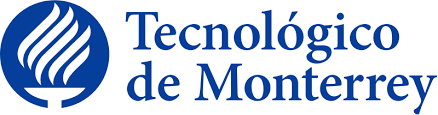

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Procesamiento de Lenguaje Natural (NLP)**
###Tecnológico de Monterrey
###Asesor: Luis Eduardo Falcón Morales
## **Avance 4. Modelos alternativos**
###**Equipo 18:**
###**A01793052 - Juan Carlos Lopez Cruz**


## **Website description**:

ConsumerAffairs is a rapidly growing online marketplace where each month millions of consumers research purchases, connect with brands, transact, write reviews and stay up to date on important consumer news.

Brands utilize our software-as-a-service platform to connect with customers, collect reviews and generate sales.

ConsumerAffairs has a creative, driven and fast-paced entrepreneurial environment. We are looking for teammates that want to win, are self-motivated, high performing and who yearn to build something big.

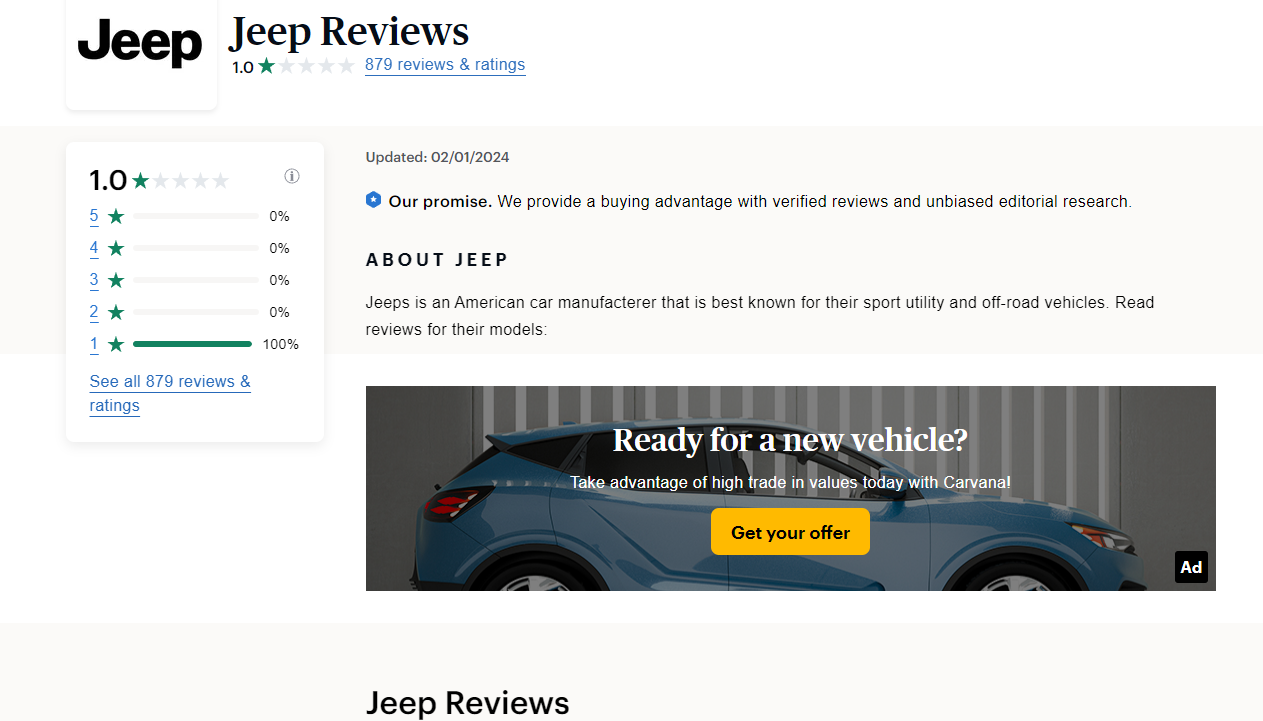

## **Libraries to install**

In [1]:
!pip install transformers datasets evaluate accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


## **Libraries to be used**

In [2]:
import torch
import requests
from bs4 import BeautifulSoup as soup
from random import randint
from time import sleep
from datasets import Dataset, load_dataset, DatasetDict
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import files
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF Matrix

##import fasttext
##import fasttext.util

from evaluate import evaluator
import evaluate
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, TrainingArguments, Trainer, pipeline
from transformers import AutoConfig
from datasets import Dataset, load_dataset, DatasetDict, load_metric



# <font color='red'>**Web Scrapping part** - No recommendable to run again</font>

Web scraping refers to the extraction of data from a website. This information is collected and then exported into a format that is more useful for the user. Be it a spreadsheet or an API.


## **1-First let's Check if the web site allows to perform Webscrapping and links Generation :**



Prints the status of the HTTP request for each URL, which includes the response status code (like 200 for success, 404 for not found, etc.).

In [ ]:
url1 = 'https://www.consumeraffairs.com/automotive/jeep.htm?page=2#scroll_to_reviews=true' ## Jeep brand 7 pages
url2= 'https://www.consumeraffairs.com/automotive/jeep-cherokee.html?page=2#scroll_to_reviews=true' ## Jeep Cherokee 3 pages
url3= 'https://www.consumeraffairs.com/automotive/jeep-wrangler.html?page=2#scroll_to_reviews=true' ## Jeep Wrangler. 3 pages
url4 = 'https://www.consumeraffairs.com/automotive/jeep-grand-cherokee.html?page=2#scroll_to_reviews=true' ## Jeep gran cherokee 4 pages
urls=[url1,url2,url3,url4]
for url in urls:
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"})
    print(f"URL: {url}, Status Code: {response.status_code}")

URL: https://www.consumeraffairs.com/automotive/jeep.htm?page=2#scroll_to_reviews=true, Status Code: 200
URL: https://www.consumeraffairs.com/automotive/jeep-cherokee.html?page=2#scroll_to_reviews=true, Status Code: 200
URL: https://www.consumeraffairs.com/automotive/jeep-wrangler.html?page=2#scroll_to_reviews=true, Status Code: 200
URL: https://www.consumeraffairs.com/automotive/jeep-grand-cherokee.html?page=2#scroll_to_reviews=true, Status Code: 200


Generation of the Links to extract all the comments from website realate to Jeep brand

In [ ]:
links = []
Pages=[7,3,3,4]
urls=[url1,url2,url3,url4]
reviews_x_pages = 1    # The pages are changing 1 by 1.

for i, url in enumerate(urls):
  for k in range(1, Pages[i]+1, reviews_x_pages):
    a = url
    if k == 1:
      a=a.replace("page=2","")     # for the first page there is not page number
    else:
      ss = str(k)  # convertimos a string el valor numérico.
      a=a.replace("2",ss)
    links.append(a)


links

['https://www.consumeraffairs.com/automotive/jeep.htm?#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=2#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=3#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=4#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=5#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=6#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep.htm?page=7#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep-cherokee.html?#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep-cherokee.html?page=2#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep-cherokee.html?page=3#scroll_to_reviews=true',
 'https://www.consumeraffairs.com/automotive/jeep-wrangler.html?#scroll_to_reviews=true',
 'https://www.consumeraffairs.co

## **2- The next step is to extract the comments of the reviewd from each page.**

The following Code extract the data from the Webside.
- The list **review** storages all the comments.
- The list **stars** storages all the rates.

These lists are storage in a data frame **ds**.

In [ ]:
# The following Code is to extract the comments from
#https://www.consumeraffairs.com/automotive/jeep.htm   (7 pages)
#https://www.consumeraffairs.com/automotive/jeep-cherokee.html (3 pages)
#https://www.consumeraffairs.com/automotive/jeep-wrangler.html  (3 pages)
#https://www.consumeraffairs.com/automotive/jeep-grand-cherokee.html  (4 pages)

reviews = [] # This list will include the comments from web scrapping in the first run
review_text= [] # This list that we will use to storage the final comments
stars =[] # This list will storage the raiting.


for link in links:
  print(link)
# This code check the status of the status if there is a response correct.
  headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36' }
  html2 = requests.get(link, headers=headers)
  #print(html2.status_code) ####

  sleep(randint(1,5))   # sleep intervals are included so that calls are not continuously made to the page
                         # and that by detecting this continuous activity, it can be detected as suspicious activity by the server
                         # and can automatically block us for it.
  bsobj1 = soup(html2.content,'lxml')   # BeautifulSoup library object to carry out our task.

  # We extract comments in either of the following two ways:
  # We include some Print just to visualize how the process is carried out:

  # The following code is to extract the text of the comments thad button More shows once the user press click
  reviews2 = [] # This list will storage per page the text of comments that button "More" shows
  for review2 in bsobj1.findAll('div', {'class' : 'js-collapsed rvw__all-text'}): # class that return the text of More button
     # print(review2.text)
      reviews2.append(review2.text.strip())
#####################

  sleep(randint(1,5))
  bsobj2 = soup(html2.content,'lxml')

  i=0 # This variable is to pass the remaining text from buttom More to the comments.
  for review in bsobj2.findAll('div', {'class' : 'rvw__top-text'}): #class tha provide the text form the pages
      if "      More" in review.text: # If the comment has the button More
        review_text =review.text.replace("                                  More", reviews2[i]) #The remaing text replace the More word in the comment
        i=i+1 # This will increase until the final remaining text per comment.
      else: # if the comments does not have the button More just extract the text.
        review_text=review.text
      #print(review_text)
      reviews.append(review_text.strip()) #Storage all in the list reviews

  sleep(randint(1,5))
  bsobj3 = soup(html2.content,'lxml')

   # Let's also extract the ratings (stars):
   # In particular in this case we will extract the entire string where the
   # rating of the hotel by the user and from there through regex you can
   # Easily perform rating extraction:
  for cal in bsobj3.findAll('div', {'class' : 'rvw__hdr-stat'}):
    cal= cal.find("div")["class"][2]
    cal=int(cal[-1])
    stars.append(cal)
  if len(reviews) != len(stars):
        diff = abs(len(reviews) - len(stars))
        if len(reviews) > len(stars):
          stars.extend([np.nan] * diff) ### add nan in the comments no rated.
  #print(stars)
  data = {
        'Review': reviews,
        'Stars': stars
    }
  ds=pd.DataFrame(data)


Let's check the data frame **ds** content.

In [ ]:
ds

,Review,Stars
0,Everything with them is 24 to 48 hours and eve...,1.0
1,So I went in to replace the hose radiator outl...,1.0
2,I was so excited to buy a Jeep but turns out i...,1.0
3,The 2015 Jeep Wrangler Willy I purchased is a ...,1.0
4,I’m a mail carrier from the Dakotas.. so I pur...,1.0
...,...,...
1658,After reading about sudden accelerations in Je...,NaN
1659,My 2002 Jeep Grand Cherokee Limited takes off ...,NaN
1660,As I was braking at a stoplight my 2000 Jeep G...,NaN
1661,About 1 1/2 months ago my wife complained to m...,NaN


## **3-Storage data scrapped from the Webside in a csv file**

Let's convert the data frame **ds** to csv file and then download to storage file in a github.

In [ ]:
ds.to_csv('Jeep_comments.csv', index=False,encoding = 'utf8')
files.download('Jeep_comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Load Data from Github**

In [3]:
url = 'https://raw.githubusercontent.com/JCLC9027/Proyecto_integrador_18/main/Jeep_comments.csv'
data= pd.read_csv(url)
data

,Review,Stars
0,Everything with them is 24 to 48 hours and eve...,1.0
1,So I went in to replace the hose radiator outl...,1.0
2,I was so excited to buy a Jeep but turns out i...,1.0
3,The 2015 Jeep Wrangler Willy I purchased is a ...,1.0
4,I’m a mail carrier from the Dakotas.. so I pur...,1.0
...,...,...
1658,After reading about sudden accelerations in Je...,NaN
1659,My 2002 Jeep Grand Cherokee Limited takes off ...,NaN
1660,As I was braking at a stoplight my 2000 Jeep G...,NaN
1661,About 1 1/2 months ago my wife complained to m...,NaN


## **Recent Data to test model.**

This data was picked up from the https://www.edmunds.com/ website for Jeep Vehicles 2022,2023 and 2024. The reason to use data from different data set is to evaluate the robustness of the Model

In [4]:
url2= 'https://raw.githubusercontent.com/JCLC9027/Proyecto_integrador_18/main/Jeep_comments_fromedmunds.csv'
test_data=pd.read_csv(url2,encoding='latin1')
test_data

,text,stars,date,vehicle
0,"I special ordered my car , waited patiently fo...",1,6/25/2023,2024 Jeep Grand Cherokee L
1,Auto stop engine can not be permanently disabl...,2,12/30/2023,2023 Jeep Cherokee
2,I leased a high altitude in August 2034. I did...,1,12/30/2023,2024 Jeep Wrangler 4xe
3,Car is awesome! Couldnt be more happy with my...,5,12/30/2022,2024 Jeep Compass
4,Bought a brand new Rubicon for my son. Fully L...,1,12/30/2022,2024 Jeep Wrangler 4xe
...,...,...,...,...
303,Super happy with my purchase,5,06/01/2021,2023 Jeep Cherokee
304,Just the right size. the only complaint is the...,5,06/11/2020,2023 Jeep Renegade
305,This subcompact SUV is roomy enough for my fam...,5,09/10/2020,2023 Jeep Renegade
306,Gorgeous vehicle loaded with details comparabl...,5,12/09/2020,2023 Jeep Cherokee


# **EDA - Exploratory Data Analysis**

## **1- Elimination of nan rows.**

Since in the data extraction some reviews no rated, in these reviews the label was added **nan** , the first thing we must do is eliminate the data that does not have a label.

In [5]:
nan_data = data.isna()
print(nan_data)

      Review  Stars
0      False  False
1      False  False
2      False  False
3      False  False
4      False  False
...      ...    ...
1658   False   True
1659   False   True
1660   False   True
1661   False   True
1662   False   True

[1663 rows x 2 columns]


In [6]:
nan_test_data=test_data.isna()
print(nan_test_data)

      text  stars   date  vehicle
0    False  False  False    False
1    False  False  False    False
2    False  False  False    False
3    False  False  False    False
4    False  False  False    False
..     ...    ...    ...      ...
303  False  False  False    False
304  False  False  False    False
305  False  False  False    False
306  False  False  False    False
307  False  False  False    False

[308 rows x 4 columns]


In [7]:
data_clean= data.dropna(subset=['Stars']) # dropna will eliminate nan reviews. (reviews not rated)
data_clean=data_clean.reset_index(drop=True) #restar index
data_clean

,Review,Stars
0,Everything with them is 24 to 48 hours and eve...,1.0
1,So I went in to replace the hose radiator outl...,1.0
2,I was so excited to buy a Jeep but turns out i...,1.0
3,The 2015 Jeep Wrangler Willy I purchased is a ...,1.0
4,I’m a mail carrier from the Dakotas.. so I pur...,1.0
...,...,...
959,My 2006 Grand Cherokee has shut off unexpected...,1.0
960,I bought a used 2002 Jeep Grand Cherokee Lared...,1.0
961,"I purchased a 2011 Grand Cherokee in July, 201...",2.0
962,I have a 2003 Jeep Grand Cherokee and have had...,1.0


## **2- Creation of binary label.**

Convert the rates scale (1,2,3,4,5) to binary problem (0,1)

**Justification:**

When it comes to converting scores from a multi-class classification problem to a binary problem, there are different approaches that can be taken. A common way to approach this situation is to set a threshold to divide ratings into positive and negative.

In this case, if you want to consider ratings between 3 and 4 as 3.5, it is possible to set a threshold at 3.5 to classify the ratings as positive or negative. Any rating equal to or greater than 3.5 would be considered positive, while any rating below 3.5 would be considered negative.

This choice is based on the assumption that a rating of 3.5 is somewhere between positive ratings (greater than 3.5) and negative ratings (less than 3.5). By considering the rating of 3.5 as positive, it is being assumed that comments with a rating close to 3.5 still contain positive elements and should therefore be treated as such.

However, it is important to note that the choice of threshold may depend on the specific context and requirements of the problem. In some cases, it may be more appropriate to adjust the threshold to classify ratings between 3 and 4 as positive or negative. This will depend on the distribution of ratings and how the concept of "positive" and "negative" is defined in the context of the problem at hand. In our case let's decide to consider ratings greater than or equal to 4 as positive and those less than 4 as negative.

In [8]:
ds = Dataset.from_dict({"text": data_clean.Review, "labels": [1 if star >= 4 else 0 for star in data_clean.Stars]})
ds

Dataset({
    features: ['text', 'labels'],
    num_rows: 964
})

In [9]:
ds.to_pandas()

,text,labels
0,Everything with them is 24 to 48 hours and eve...,0
1,So I went in to replace the hose radiator outl...,0
2,I was so excited to buy a Jeep but turns out i...,0
3,The 2015 Jeep Wrangler Willy I purchased is a ...,0
4,I’m a mail carrier from the Dakotas.. so I pur...,0
...,...,...
959,My 2006 Grand Cherokee has shut off unexpected...,0
960,I bought a used 2002 Jeep Grand Cherokee Lared...,0
961,"I purchased a 2011 Grand Cherokee in July, 201...",0
962,I have a 2003 Jeep Grand Cherokee and have had...,0


## **Test data creation of binary**

In [10]:
ds_test = Dataset.from_dict({"text": test_data.text, "labels": [1 if star >= 4 else 0 for star in test_data.stars]})
ds_test

Dataset({
    features: ['text', 'labels'],
    num_rows: 308
})

In [11]:
ds_test.to_pandas()

,text,labels
0,"I special ordered my car , waited patiently fo...",0
1,Auto stop engine can not be permanently disabl...,0
2,I leased a high altitude in August 2034. I did...,0
3,Car is awesome! Couldnt be more happy with my...,1
4,Bought a brand new Rubicon for my son. Fully L...,0
...,...,...
303,Super happy with my purchase,1
304,Just the right size. the only complaint is the...,1
305,This subcompact SUV is roomy enough for my fam...,1
306,Gorgeous vehicle loaded with details comparabl...,1


We will Generate 2 files to storage comments rated and comments no rated related to Jeep brand.

In [12]:
# Calculate the ratio of positive and negative tags
label_count = ds.to_pandas().labels.value_counts()
proportion_negative, proportion_positive = (label_count/len(ds['labels'])).tolist()
# Print the ratio of positive and negative labels
print(f"% of positive comments: {proportion_positive:.2f}")
print(f"% of negative comments: {proportion_negative:.2f}")

% of positive comments: 0.13
% of negative comments: 0.87


In [13]:
label_count

0    841
1    123
Name: labels, dtype: int64

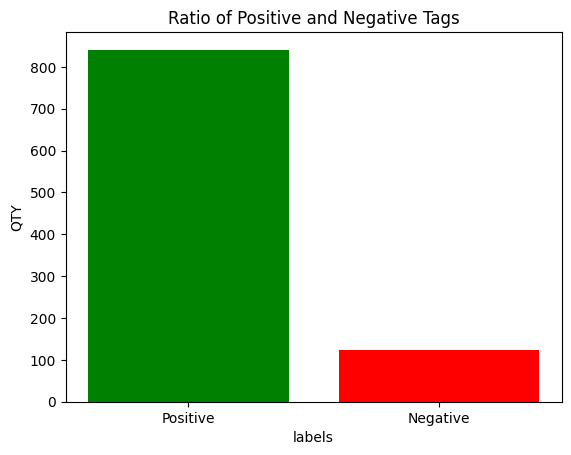

In [14]:
# Plot the proportions
labels = ['Positive', 'Negative']
proportions = [proportion_positive, proportion_negative]

plt.bar(labels, label_count.tolist(), color=['green', 'red'])
plt.xlabel('labels')
plt.ylabel('QTY')
plt.title('Ratio of Positive and Negative Tags')
plt.show()

In [15]:
ds_copy = ds.map()

Map:   0%|          | 0/964 [00:00<?, ? examples/s]

# **3- Data Split for Train and Val.**

In [16]:
def split_dataset(ds):
    #Hacemos partición de entrenamiento, validación y prueba
    ds = ds.class_encode_column ('labels')

    train_test_valid = ds.train_test_split(test_size=0.3, seed=42, stratify_by_column='labels')

    # Particionamos validación y prueba en dos grupos (c/u con 50%)
    test_valid = train_test_valid['test'].train_test_split(test_size=0.1, seed = 42, stratify_by_column='labels')

    #Ahora hacemos un solo dataset con las tres particiones
    return DatasetDict({
    'train': train_test_valid['train'],
    'test': test_valid['test'],
    'valid': test_valid['train']})

In [17]:
ds_split = split_dataset(ds)
ds_split

Stringifying the column:   0%|          | 0/964 [00:00<?, ? examples/s]

Casting to class labels:   0%|          | 0/964 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 674
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 29
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 261
    })
})

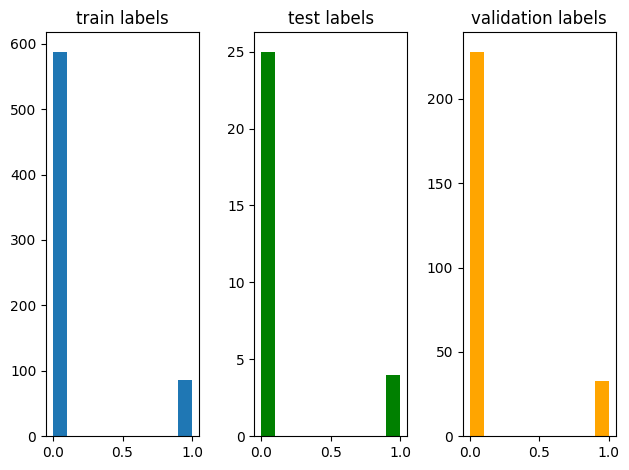

In [18]:
from matplotlib import pyplot as plt
fig,(ax1, ax2, ax3) = plt.subplots(1,3)
ax1.set_title('train labels')
ax1.hist(ds_split['train']['labels'])
ax2.set_title('test labels')
ax2.hist(ds_split['test']['labels'],color='green')
ax3.set_title('validation labels')
ax3.hist(ds_split['valid']['labels'],color='orange')
fig.tight_layout()

# <font color='red'> **Data Augmentation**- No recommendable to run again

## **1- Creation of coype of data set to add the augmented Data.**

In [ ]:
ds_aug_split=ds_split.map()

Map:   0%|          | 0/674 [00:00<?, ? examples/s]

Map:   0%|          | 0/29 [00:00<?, ? examples/s]

Map:   0%|          | 0/261 [00:00<?, ? examples/s]

In [ ]:
ds_aug_split

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 674
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 29
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 261
    })
})

## **2-Filter positive and Negative comments**.

In [ ]:
labels_1 = ds_aug_split['train'].to_pandas()[ds_aug_split['train'].to_pandas().labels== 1]
labels_0 = ds_aug_split['train'].to_pandas()[ds_aug_split['train'].to_pandas().labels== 0]

In [ ]:
labels_1

,text,labels
0,"Decent SUV, nice features, Jeep is usually alw...",1
6,I get about one phone call a month from a Jeep...,1
13,"On Wednesday November 23, 2011, I was pulling ...",1
20,I have great experience with my Jeep Compass. ...,1
39,So the lighting bolt light and esp light comes...,1
...,...,...
655,"Great vehicle, has had very few maintenance is...",1
656,The Jeep Cherokee Trailhawk rides surprisingly...,1
660,I love my Jeep Renegade but I wish it had more...,1
668,I’ve owned dozens of Jeeps since 1994. My 2018...,1


In [ ]:
labels_0

,text,labels
1,I have 2 Jeeps. One is a 2012 Jeep Patriot tha...,0
2,"Ok, I had an issue with my jeep stalling as I ...",0
3,I was so excited to buy a Jeep but turns out i...,0
4,My 2014 Jeep Cherokee was fine until July 1st ...,0
5,Battery died on me 4 times within 1 year. Thei...,0
...,...,...
667,"While driving my two young children, my 2010 J...",0
669,Purchased a 2014 Jeep Grand Cherokee and in le...,0
670,I recently purchased a used 2007 Jeep Commande...,0
671,My 2005 Jeep Grand Cherokee with a Hemi engine...,0


## **3-Text Generation**

In [ ]:
def gen_data(prompt,num):
  gen_comments=[]
  for comment in prompt:
    comments_generated = generator(
        comment,
        #max_length=500,
        do_sample=True,
        num_return_sequences = num,
        max_new_tokens=200,  # Qty Maximum of tokens to be added in the comment
        temperature=0.6)  #Latency to create text.
    gen_comments.extend(comments_generated)
  return gen_comments

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

generator=pipe = pipeline("text-generation", model="openai-community/gpt2")
# Define Comments:
positive_prompt =labels_1.text.tolist() # let's use all the positive comments 86
negative_prompt =labels_0.text.tolist()[0:20] # let's use only 20 comments

# Generar comentarios positivos y negativos
num_neg_comments = 1 # generate # comments per positive_prompt
num_pos_comments = 5 # generate # comment per negative_prompt
positive_comments = gen_data(positive_prompt,num_pos_comments)
negative_comments = gen_data(negative_prompt,num_neg_comments)



In [ ]:
positive_comments = [comment['generated_text'] for comment in positive_comments]
negative_comments = [comment['generated_text'] for comment in negative_comments]

In [ ]:
positive_labels=np.ones(len(positive_comments)).astype(int).tolist()
negative_labels=np.zeros(len(negative_comments)).astype(int).tolist()

In [ ]:
ds_pos=pd.DataFrame({"text":positive_comments,"labels":positive_labels})
ds_neg=pd.DataFrame({"text":negative_comments,"labels":negative_labels})

## **4- Creation of DataFrame and Storage in a file (Possitive and negative comments)**

In [ ]:
ds_gen = pd.concat([ds_pos, ds_neg])
ds_gen

,text,labels
0,"Decent SUV, nice features, Jeep is usually alw...",1
1,"Decent SUV, nice features, Jeep is usually alw...",1
2,"Decent SUV, nice features, Jeep is usually alw...",1
3,"Decent SUV, nice features, Jeep is usually alw...",1
4,"Decent SUV, nice features, Jeep is usually alw...",1
...,...,...
15,I own a 2005 Jeep Liberty which I bought brand...,0
16,Feb 2015 my 2014 Jeep Cherokee lost power whil...,0
17,I have a 2004 Jeep Liberty Limited which I pur...,0
18,I bought a 2014 Jeep Cherokee Trailhawk in Aug...,0


In [ ]:
ds_gen.to_csv('Jeep_synthetic_comments.csv', index=False,encoding = 'utf8')
files.download('Jeep_synthetic_comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Load Augmented Data from Github**

In [19]:
ds_aug_split=ds_split.map()
url = 'https://raw.githubusercontent.com/JCLC9027/Proyecto_integrador_18/main/Jeep_synthetic_comments.csv'
ds_synthetic= pd.read_csv(url)
ds_synthetic

Map:   0%|          | 0/674 [00:00<?, ? examples/s]

Map:   0%|          | 0/29 [00:00<?, ? examples/s]

Map:   0%|          | 0/261 [00:00<?, ? examples/s]

,text,labels
0,"Decent SUV, nice features, Jeep is usually alw...",1
1,"Decent SUV, nice features, Jeep is usually alw...",1
2,"Decent SUV, nice features, Jeep is usually alw...",1
3,"Decent SUV, nice features, Jeep is usually alw...",1
4,"Decent SUV, nice features, Jeep is usually alw...",1
...,...,...
445,I own a 2005 Jeep Liberty which I bought brand...,0
446,Feb 2015 my 2014 Jeep Cherokee lost power whil...,0
447,I have a 2004 Jeep Liberty Limited which I pur...,0
448,I bought a 2014 Jeep Cherokee Trailhawk in Aug...,0


In [20]:
positive_comments = ds_synthetic [ds_synthetic.labels== 1]
negative_comments= ds_synthetic[ds_synthetic.labels== 0]

In [21]:
positive_comments.head()

,text,labels
0,"Decent SUV, nice features, Jeep is usually alw...",1
1,"Decent SUV, nice features, Jeep is usually alw...",1
2,"Decent SUV, nice features, Jeep is usually alw...",1
3,"Decent SUV, nice features, Jeep is usually alw...",1
4,"Decent SUV, nice features, Jeep is usually alw...",1


In [22]:
negative_comments.head()

,text,labels
430,I have 2 Jeeps. One is a 2012 Jeep Patriot tha...,0
431,"Ok, I had an issue with my jeep stalling as I ...",0
432,I was so excited to buy a Jeep but turns out i...,0
433,My 2014 Jeep Cherokee was fine until July 1st ...,0
434,Battery died on me 4 times within 1 year. Thei...,0


In [23]:
for comment, label in zip(negative_comments.text, negative_comments.labels): ds_aug_split['train'] = ds_aug_split['train'].add_item({'text': comment, 'labels': label})
for comment, label in zip(positive_comments.text, positive_comments.labels): ds_aug_split['train'] = ds_aug_split['train'].add_item({'text': comment, 'labels': label})

In [24]:
ds_aug_split

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 1124
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 29
    })
    valid: Dataset({
        features: ['text', 'labels'],
        num_rows: 261
    })
})

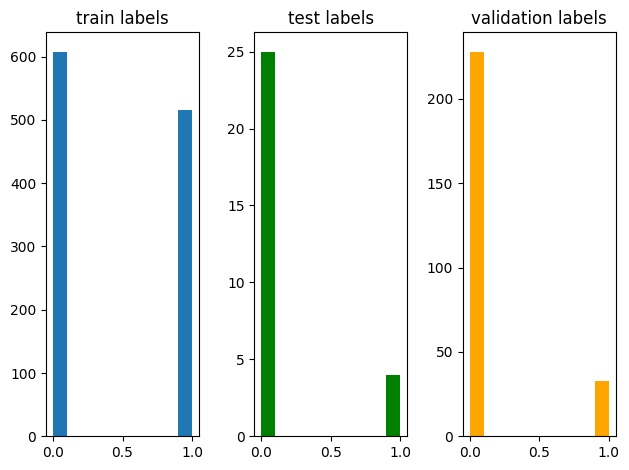

In [25]:
from matplotlib import pyplot as plt
fig,(ax1, ax2, ax3) = plt.subplots(1,3)
ax1.set_title('train labels')
ax1.hist(ds_aug_split['train']['labels'])
ax2.set_title('test labels')
ax2.hist(ds_aug_split['test']['labels'],color='green')
ax3.set_title('validation labels')
ax3.hist(ds_aug_split['valid']['labels'],color='orange')
fig.tight_layout()

#**Sentiment Analysis using -Transformer "distilbert-base-cased"**

Train with PyTorch Trainer

## **1- Load transformer model tokenizer and tokenize the data sets.**

In [42]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")


def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


tokenized_datasets = ds_split.map(tokenize_function, batched=True)
tokenized_dataset_test=ds_test.map(tokenize_function, batched=True)

Map:   0%|          | 0/674 [00:00<?, ? examples/s]

Map:   0%|          | 0/29 [00:00<?, ? examples/s]

Map:   0%|          | 0/261 [00:00<?, ? examples/s]

Map:   0%|          | 0/308 [00:00<?, ? examples/s]

In [43]:
train_dataset = tokenized_datasets["train"].shuffle(seed=42)
valid_dataset = tokenized_datasets["valid"].shuffle(seed=42)
test_dataset = tokenized_datasets["test"].shuffle(seed=42)
test2_dataset = tokenized_dataset_test.shuffle(seed=42) # Dataset from different website.


##**2-Verify and define the device to work**

In [44]:
def get_device():
    if torch.backends.mps.is_available():
        return torch.device('mps')
    elif torch.cuda.is_available():
        return torch.device(torch.cuda.current_device())
    else:
        return torch.device('cpu')

In [45]:
get_device()

device(type='cuda', index=0)

## **3- Load Transformer model for clasification**

In [31]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
model.to(get_device())

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

##**4- Define the compute metric**

In [48]:
from datasets import load_metric
metric = load_metric("accuracy")

<ipython-input-48-a8d3d6c893c5>:2: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:753: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.17.0/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [37]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [38]:
# from datasets import load_metric
# def compute_metrics(eval_pred):
#     load_accuracy = evaluate.load("accuracy")
#     logits, labels = eval_pred
#     predictions = np.argmax(logits, axis=-1)
#     accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
#     return {"accuracy": accuracy}

In [39]:
def get_training_args():

    return TrainingArguments(
    output_dir='test_trainer',#f'./results',
    learning_rate=2e-5,
    do_eval=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    save_strategy="epoch")

##**5-Define the training arguments and Trainer**

In [40]:
#training_args = get_training_args()
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

In [46]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
)

## **6-Train the Model and Evaluate the model**

In [49]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.210108,0.946360
2,No log,0.212945,0.957854
3,No log,0.212830,0.954023


Epoch,Training Loss,Validation Loss


TrainOutput(global_step=255, training_loss=0.10212002174527038, metrics={'train_runtime': 108.1351, 'train_samples_per_second': 18.699, 'train_steps_per_second': 2.358, 'total_flos': 357132106776576.0, 'train_loss': 0.10212002174527038, 'epoch': 3.0})

In [50]:
trainer.evaluate(test_dataset)

{'eval_loss': 0.0032958860974758863,
 'eval_accuracy': 1.0,
 'eval_runtime': 0.5039,
 'eval_samples_per_second': 57.549,
 'eval_steps_per_second': 7.938,
 'epoch': 3.0}

In [51]:
trainer.evaluate(test2_dataset)

{'eval_loss': 0.5808492302894592,
 'eval_accuracy': 0.8571428571428571,
 'eval_runtime': 5.2452,
 'eval_samples_per_second': 58.721,
 'eval_steps_per_second': 7.435,
 'epoch': 3.0}

## **7-Visual review of the Data predictions**

### **Using test dataset form the same database**

In [52]:
predictions = trainer.predict(test_dataset)
final_preds = [{ 'text': test_dataset['text'][i], 'pred': pred, 'label': test_dataset['labels'][i] } for i,pred in enumerate(predictions.predictions.argmax(-1))]

In [53]:
df_pred_tuned = pd.DataFrame(final_preds)
df_pred_tuned

,text,pred,label
0,The water pump on my 2009 Jeep Liberty went ba...,0,0
1,I have purchased a brand new 2016 Jeep Latitud...,0,0
2,Jeep Compass is good on gas. I am glad I picke...,1,1
3,I love my Jeep Sport Wrangler. Owning a Jeep i...,1,1
4,I purchased a 2022 Jeep Grand Cherokee Limited...,0,0
5,It's a very good looking car. Great color that...,1,1
6,"I am 65 years old, and purchased a 2007 Jeep L...",0,0
7,"The Jeep is sturdy, strong, reliable and handl...",1,1
8,I bought a Jeep Cherokee Trailhawk used in 202...,0,0
9,Just wanted to warn Jeep owners or possible Je...,0,0


### **Using test2 dataset form the data from diferent website**

In [54]:
predictions2 = trainer.predict(test2_dataset)
final_preds2 = [{ 'text': test2_dataset['text'][i], 'pred': pred, 'label': test2_dataset['labels'][i] } for i,pred in enumerate(predictions2.predictions.argmax(-1))]

In [55]:
df_pred_tuned2 = pd.DataFrame(final_preds2)
df_pred_tuned2

,text,pred,label
0,I love the highup feeling in the Jeep as we ri...,1,1
1,I Bought the 2023 jeep grand Cherokee limited ...,0,0
2,"Ive only had the Jeep for a week, so far I lo...",1,1
3,This is the first brand new SUV I have bought....,1,1
4,Love the features and color. Great for our add...,1,1
...,...,...,...
303,We love our 2022! This is a new plug-in hybrid...,1,1
304,This is my 3rd Renegade and I love it! So cute...,1,1
305,I have this on loan while my minivan is being ...,0,0
306,Great ride!,1,1


## **8-Confusion Matrix Evaluation**

### **Using test dataset form the same database**

Matriz de confusión - finetuning-sentiment-model-Jeep_comments_test_data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         4

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



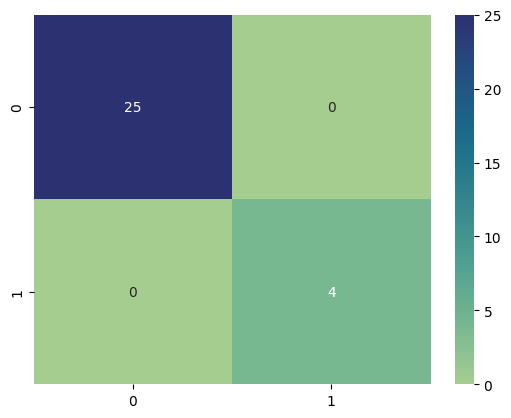

In [56]:
cm_tuned = confusion_matrix(df_pred_tuned['label'],df_pred_tuned['pred'])
sns.heatmap(cm_tuned, annot=True, fmt = "d",cmap="crest")
print("Matriz de confusión - finetuning-sentiment-model-Jeep_comments_test_data")
print(classification_report(df_pred_tuned['label'],df_pred_tuned['pred']))

### **Using test dataset form the same database**

Matriz de confusión - finetuning-sentiment-model-Jeep_comments_test2_data
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        88
           1       0.95      0.84      0.89       220

    accuracy                           0.86       308
   macro avg       0.82      0.87      0.84       308
weighted avg       0.88      0.86      0.86       308



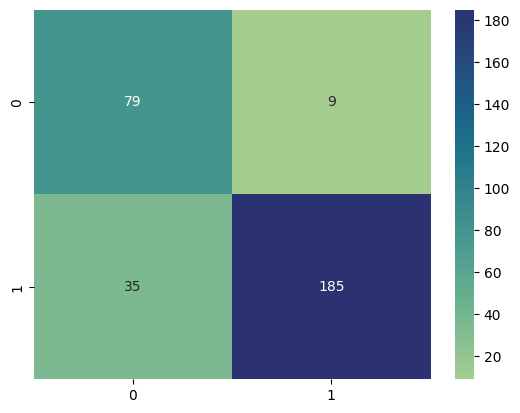

In [57]:
cm_tuned = confusion_matrix(df_pred_tuned2['label'],df_pred_tuned2['pred'])
sns.heatmap(cm_tuned, annot=True, fmt = "d",cmap="crest")
print("Matriz de confusión - finetuning-sentiment-model-Jeep_comments_test2_data")
print(classification_report(df_pred_tuned2['label'],df_pred_tuned2['pred']))

#**Sentiment Analysis using -Transformer "distilbert-base-cased"**  <font color='Blue'> with Data Augmented
Train with PyTorch Trainer

## **tokenize the data sets.**

In [58]:
tokenized_datasets = ds_aug_split.map(tokenize_function, batched=True)
tokenized_dataset_test=ds_test.map(tokenize_function, batched=True)

Map:   0%|          | 0/1124 [00:00<?, ? examples/s]

Map:   0%|          | 0/29 [00:00<?, ? examples/s]

Map:   0%|          | 0/261 [00:00<?, ? examples/s]

Map:   0%|          | 0/308 [00:00<?, ? examples/s]

In [59]:
train_dataset = tokenized_datasets["train"].shuffle(seed=42)
valid_dataset = tokenized_datasets["valid"].shuffle(seed=42)
test_dataset = tokenized_datasets["test"].shuffle(seed=42)
test2_dataset = tokenized_dataset_test.shuffle(seed=42) # Dataset from different website.

##**Define the training arguments and Trainer**

In [60]:
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

In [61]:
trainer2 = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    compute_metrics=compute_metrics,
)

## **Train the Model and Evaluate the model**

In [62]:
trainer2.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.303498,0.954023
2,No log,0.359496,0.950192
3,No log,0.361360,0.950192


TrainOutput(global_step=423, training_loss=0.0471661479760569, metrics={'train_runtime': 178.3864, 'train_samples_per_second': 18.903, 'train_steps_per_second': 2.371, 'total_flos': 446680068268032.0, 'train_loss': 0.0471661479760569, 'epoch': 3.0})

In [63]:
trainer2.evaluate(test_dataset)

{'eval_loss': 0.00017196161206811666,
 'eval_accuracy': 1.0,
 'eval_runtime': 0.5276,
 'eval_samples_per_second': 54.965,
 'eval_steps_per_second': 7.581,
 'epoch': 3.0}

In [64]:
trainer2.evaluate(test2_dataset)

{'eval_loss': 1.1769459247589111,
 'eval_accuracy': 0.8181818181818182,
 'eval_runtime': 5.1015,
 'eval_samples_per_second': 60.374,
 'eval_steps_per_second': 7.645,
 'epoch': 3.0}

## **7-Visual review of the Data predictions**

### **Using test dataset form the same database**

In [81]:
predictions = trainer2.predict(test_dataset)
final_preds = [{ 'text': test_dataset['text'][i], 'pred': pred, 'label': test_dataset['labels'][i] } for i,pred in enumerate(predictions.predictions.argmax(-1))]
df_pred_tuned = pd.DataFrame(final_preds)

### **Using test2 dataset form the data from diferent website**

In [85]:
predictions2 = trainer2.predict(test2_dataset)
final_preds2 = [{ 'text': test2_dataset['text'][i], 'pred': pred, 'label': test2_dataset['labels'][i] } for i,pred in enumerate(predictions2.predictions.argmax(-1))]
df_pred_tuned2 = pd.DataFrame(final_preds2)

## **8-Confusion Matrix Evaluation**

### **Using test dataset form the same database**

Confusion Matriz- finetuning-sentiment-with data augmentation-jeep-customer-review
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00         4

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



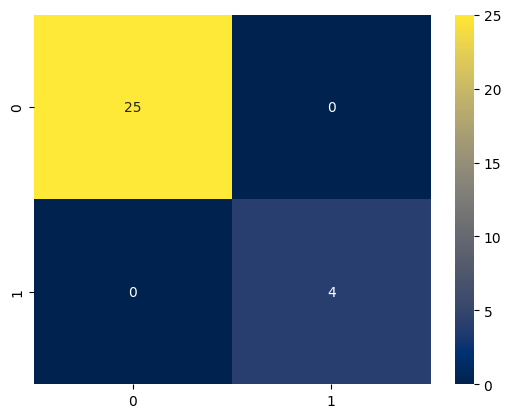

In [83]:
cm_tuned = confusion_matrix(df_pred_tuned['label'],df_pred_tuned['pred'])
sns.heatmap(cm_tuned, annot=True, fmt = "d",cmap="cividis")
print("Confusion Matriz- finetuning-sentiment-with data augmentation-jeep-customer-review")
print(classification_report(df_pred_tuned['label'],df_pred_tuned['pred']))

### **Using test dataset form the same database**

Confusion Matriz- finetuning-sentiment-with data augmentation-jeep-customer-review_test2_data
              precision    recall  f1-score   support

           0       0.62      0.97      0.75        88
           1       0.98      0.76      0.86       220

    accuracy                           0.82       308
   macro avg       0.80      0.86      0.80       308
weighted avg       0.88      0.82      0.83       308



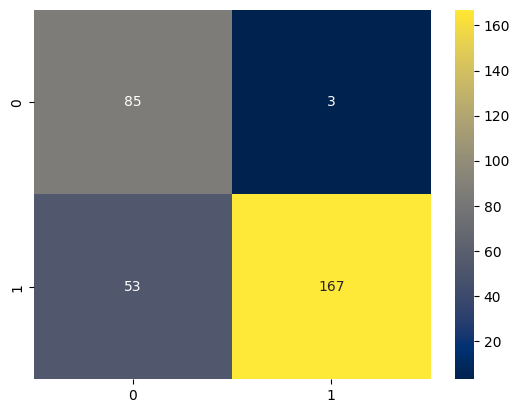

In [86]:
cm_tuned = confusion_matrix(df_pred_tuned2['label'],df_pred_tuned2['pred'])
sns.heatmap(cm_tuned, annot=True, fmt = "d",cmap="cividis")
print("Confusion Matriz- finetuning-sentiment-with data augmentation-jeep-customer-review_test2_data")
print(classification_report(df_pred_tuned2['label'],df_pred_tuned2['pred']))

# <font color='Green'>**Using NLP Tools**

## **Libraries to install for embbedings**


In [33]:
# Just run this if you have not download the Fasttext embbedbings Model.
!pip install fasttext # just run once and then return it as a comment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199775 sha256=d83a439ec81cc1a31cf87cae6c585952debc65afa0e3eb563fb41f7936c5776f
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [34]:
import fasttext
import fasttext.util

## **Load Data in to List.**


In [38]:
X=ds.to_pandas().text.tolist()
Y=ds.to_pandas().labels.tolist()
X_train_a=ds_synthetic.text.tolist() ## Augmented Data for Training
Y_train_a=ds_synthetic.labels.tolist() ## Augmented Data for Training
X_test2=ds_test.to_pandas().text.tolist() ## Data to test models from different web site
Y_test2=ds_test.to_pandas().labels.tolist() ## Data to test models from different web site


## **Text Preprocessing**

Stop words Elimination, Clean, Tokenization and lematization.

### Download the library of NLTK (Natural Language Toolkit) for data processing.

In [46]:
nltk.download('punkt')    # It is a tokenizer that helps split text into statements using an unsupervised model.
nltk.download('stopwords')    # to access stopwords in multiple languages.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [47]:
# Let's see the list of stopwords that are included by default in the NLTK library suite:

print(len(stopwords.words('english')))
print(stopwords.words('english'))

# Let's consider the following list of words associated with negations in English:

negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]


179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than

In [48]:
#Exclude all words in the "negwords" list from the default "stopwords" list, to define a new set called mystopwords

mystopwords = list(set(stopwords.words('english')) - set(negwords))

print(len(mystopwords))
print(mystopwords)


139
['for', 'that', 'just', 'under', 'why', 'few', 'herself', 'will', 'her', 'at', 're', 'if', 'here', 'y', 'do', 'should', 'while', 'was', 'our', "should've", 'doing', 'ours', 's', 'above', 'very', 'll', 'down', 'those', 'what', 'your', 'below', 'about', 'off', 'such', 'have', 'd', 'but', "it's", 'further', 'any', 'you', 'by', 'my', "you'll", 'ourselves', 'myself', 'are', 'against', 'again', 'both', 'which', 'she', 'with', 'before', 'to', 'these', 'them', 'then', 'some', 'him', "you've", 'into', 'or', 'so', 'ma', 'had', 'only', 'through', 'yourselves', 'and', 'on', 'it', 'whom', 'yours', 'he', 't', "that'll", 'of', 'an', 'own', 'same', 'there', 'more', "she's", 'm', 'were', 'has', 'because', 'as', 'the', 'between', 'its', 've', 'out', 'who', 'after', 'we', 'i', 'this', 'his', 'o', "you'd", "you're", 'me', 'now', 'is', 'been', 'until', 'their', 'how', 'where', 'hers', 'during', 'they', 'in', 'when', 'did', 'a', 'than', 'can', 'each', 'other', 'theirs', 'himself', 'from', 'itself', 'the

## **Clean and tokenization:**

Justification of the cleaning process:

In the next block we define the function that will clean the text and return the tokens of each comment. The following steps were performed for the cleaning process:

1- Remove special characters: Punctuation marks and special characters do not add value to the type of analysis we want to perform. Therefore, not removing them could affect the performance of our model. For this reason it was decided to remove these characters.

2-Convert all letters to lowercase: This is done to prevent the model from identifying the same words as different but one written in lowercase and another in uppercase.

3-Stemming: This option was selected since when testing the model with both Stemming and Lemmatization, the latter tends to overtrain the model. In terms of accuracy, both have similar behavior for the data set we are working with.

In [49]:
# Clean and Tokenization:

def clean_tok(doc):
    ps=PorterStemmer()
    # With REGEX we replace with space everything that is not a letter or space, leaving only alphabetic characters
    doc = re.sub(r'[^A-Za-z\s]', ' ', doc)
    # With REGEX we replace all double or greater spaces with single spaces
    doc = re.sub(r'\s{2,}', ' ', doc)
    # We simplify everything to lowercase
    doc = doc.lower()
    # We apply tokenization
    doc = nltk.word_tokenize(doc)
    # We filter the stopwords, we consider only tokens greater than 1
    return [ps.stem(word) for word in doc if word not in mystopwords and len(word) > 1]

In [50]:
Xclean = np.array([clean_tok(x) for x in X], dtype=object)  #Comments processed

#Delete empty comments
filter_Xclean = [False if com == [] else True for com in Xclean]
Xclean = Xclean[filter_Xclean]


#Remove the Y's from these comments to maintain the size of the data set
Y = np.array(Y, dtype=object)
Y = Y[filter_Xclean]



for x in Xclean[5:10]:
  print(x)
Y[5:10] # labels

['name', 'deborah', 'purchas', 'compass', 'februari', 'mile', 'total', 'fell', 'love', 'vehicl', 'ran', 'like', 'dream', 'new', 'vehicl', 'mile', 'engin', 'start', 'run', 'rough', 'transmiss', 'start', 'shift', 'hard', 'took', 'dealership', 'per', 'recommend', 'jeep', 'custom', 'servic', 'open', 'case', 'said', 'check', 'certifi', 'chrysler', 'technician', 'check', 'softwar', 'updat', 'fix', 'shift', 'problem', 'gear', 'ask', 'owner', 'not', 'notifi', 'softwar', 'updat', 'told', 'way', 'find', 'softwar', 'updat', 'take', 'dealership', 'someth', 'els', 'return', 'jeep', 'transmiss', 'shift', 'becam', 'wors', 'return', 'dealership', 'day', 'technician', 'rode', 'felt', 'issu', 'discuss', 'week', 'jeep', 'dealership', 'multipl', 'technician', 'drove', 'felt', 'issu', 'transmiss', 'receiv', 'written', 'statement', 'pick', 'jeep', 'exact', 'issu', 'dealership', 'return', 'state', 'noth', 'wrong', 'show', 'no', 'code', 'jeep', 'custom', 'servic', 'close', 'case', 'within', 'week', 'transmiss

array([0, 0, 0, 0, 0], dtype=object)

**Note:** Rationale for the additional cleaning process:

Now we proceed to generate the clean comments. As a result of the cleaning, some lines remain empty so they are eliminated. Leaving these lines empty affects the performance of the model, since it considers them as part of the vocabulary during the analysis.

## **Word Cloud Analysis**

Word cloud analysis is a technique used to visualize the frequency of words within a given text corpus. It generates a visual representation where the size of each word corresponds to its frequency in the text.



In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

pos_tok=[]  # initialize lists of positive and negative tokens
neg_tok=[]

for x,c in zip(Xclean, Y):
  if c==1:
    pos_tok.extend(x)   # tokens used in positive comments
  else:
    neg_tok.extend(x)   # tokens used in negative comments

pt = ' '.join(pos_tok)  # we require a single string for each class for the word cloud.
nt = ' '.join(neg_tok)

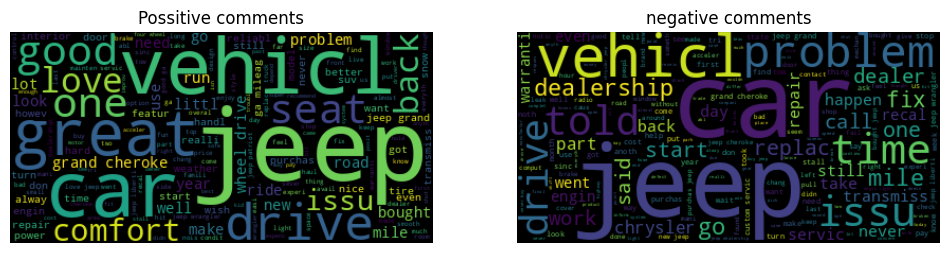

In [52]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))

# Positive feedback word cloud:
wordcloudnn = WordCloud().generate(pt)
ax1.imshow(wordcloudnn, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Possitive comments')

# Negative comments word cloud:
wordcloudnn = WordCloud().generate(nt)
ax2.imshow(wordcloudnn, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('negative comments')

plt.show()

## **Data Split for Train, Validation and Test**

### **Original Data**

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1,stratify=Y)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.5, shuffle=True, random_state=1, stratify=y_val_and_test)

print('X,y Train:', len(x_train), len(y_train))      # los "x_" son "list" y los "y_" son "Series"
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 674 674
X,y Val: 145 145
X,y Test 145 145


## **Vocabulary creation and Filtration:**

In this step let's create a first vocabulary using only the training data. This data is used to avoid information leakage (data leak).

### **Vocabulary creation**

In [55]:
#We create a first vocabulary, which will not be cut so as not to lose information

from collections import Counter

vocab = Counter() #Vocabulario

for k in range(len(x_train)):
 vocab.update(x_train[k])

print('Training dictionary length:', len(vocab))
print('\n(word,frequency):')
print(vocab.most_common(100))


Training dictionary length: 4309

(word,frequency):
[('jeep', 2058), ('not', 1203), ('car', 927), ('vehicl', 736), ('problem', 573), ('time', 567), ('would', 521), ('drive', 507), ('no', 502), ('get', 496), ('back', 485), ('dealership', 471), ('issu', 437), ('servic', 413), ('chrysler', 411), ('mile', 379), ('call', 379), ('new', 373), ('go', 370), ('told', 360), ('fix', 356), ('dealer', 353), ('replac', 345), ('start', 337), ('one', 323), ('work', 305), ('day', 302), ('year', 298), ('said', 295), ('engin', 295), ('like', 286), ('warranti', 282), ('cheroke', 274), ('light', 266), ('purchas', 264), ('month', 261), ('never', 257), ('transmiss', 252), ('took', 251), ('bought', 251), ('could', 242), ('part', 241), ('need', 231), ('take', 229), ('still', 229), ('even', 211), ('custom', 211), ('happen', 207), ('week', 207), ('repair', 202), ('buy', 198), ('come', 195), ('anoth', 192), ('went', 189), ('recal', 186), ('got', 186), ('also', 185), ('don', 177), ('grand', 177), ('stop', 174), ('w

**Note:** This additional step is to eliminate words with a frecuency 1 to avoid creating sparse matrices, since as the dictionary grows so will the matrices. The above would cause the model to be overtrained.

In [56]:
#Considers a minimum frequency appropriate for the project

min_freq = 2

midicc = {k: v for k, v in vocab.items() if v >= min_freq}

print('New length of new vocabulary:', len(midicc))
print(list(midicc.items())[0:5]) # let's look at some dictionary items.

New length of new vocabulary: 2691
[('jeep', 2058), ('liberti', 119), ('sport', 29), ('drive', 507), ('listen', 6)]


### **Filtration**

Let's filter the Train, Validation and Test sets with respect to the new proposed vocabulary

In [57]:
#Function to filter new vocabulary

def filter_out_empty_comments(doc: list, y: list) -> tuple:
    filter_list = [False if line == [] else True for line in doc]
    filtered_doc = np.array(doc, dtype=object)[filter_list]
    filtered_y = np.array(y, dtype = int)[filter_list]

    return (filtered_doc, filtered_y)

In [58]:
train_x = []
for ss in x_train:
  train_x.append([w for w in ss if w in midicc])

val_x = []
for ss in x_val:
  val_x.append([w for w in ss if w in midicc])

test_x = []
for ss in x_test:
  test_x.append([w for w in ss if w in midicc])

train_x, y_train = filter_out_empty_comments(train_x, y_train)
val_x, y_val = filter_out_empty_comments(val_x, y_val)
test_x, y_test = filter_out_empty_comments(test_x, y_test)

#Review output
for k in range(3):
  print('before:', x_train[k])
  print('after:', train_x[k])

before: ['jeep', 'liberti', 'sport', 'drive', 'listen', 'stereo', 'drown', 'wind', 'nois', 'sky', 'slider', 'roof', 'pop', 'slam', 'open', 'someth', 'flew', 'sound', 'like', 'brace', 'bar', 'dark', 'thank', 'no', 'one', 'behind', 'took', 'brandon', 'chrysler', 'dodg', 'jeep', 'unfortun', 'don', 'seem', 'abl', 'fix', 'anyth', 'without', 'screw', 'thing', 'improperli', 'instal', 'slider', 'top', 'greas', 'water', 'stain', 'match', 'carpet', 'botch', 'first', 'attempt', 'fix', 'fact', 'top', 'would', 'not', 'close', 'complet', 'funni', 'not', 'seem', 'find', 'problem', 'major', 'issu', 'happen', 'love', 'jeep', 'slider', 'top', 'noisi', 'unpredict', 'danger']
after: ['jeep', 'liberti', 'sport', 'drive', 'listen', 'stereo', 'wind', 'nois', 'sky', 'slider', 'roof', 'pop', 'slam', 'open', 'someth', 'flew', 'sound', 'like', 'brace', 'bar', 'dark', 'thank', 'no', 'one', 'behind', 'took', 'chrysler', 'dodg', 'jeep', 'unfortun', 'don', 'seem', 'abl', 'fix', 'anyth', 'without', 'screw', 'thing', 

## **Text Encoding or Text representation**

Text representation in NLP involves transforming raw text data into a format that machine learning models can understand and process effectively.

For this project we will compare 3 Techniques:

- Cont Vectorizer.
- TF-IDF (Term Frequency-Inverse Document Frequency).
- Word Embeddings -> Embedded FastText vectors pre-trained by Facebook.

## **Count vectorizer**
The count vectorizer is a way to represent text in natural language processing that converts a collection of documents into a document-word matrix. Encoding is therefore done at the document level, rather than at the token level.

Being a bag-of-words model, information regarding the position of the tokens or their context is not encoded, only information about whether they appear and their frequency.

In [59]:
# Let's get the counting arrays
train_x_docs = []
for k in range(len(train_x)):
  train_x_docs.append(' '.join(train_x[k]))

val_x_docs = []
for k in range(len(val_x)):
  val_x_docs.append(' '.join(val_x[k]))

test_x_docs = []
for k in range(len(test_x)):
  test_x_docs.append(' '.join(test_x[k]))


# let's verify that the first Train comments are each as a single string:
for k in range(3):
  print(train_x_docs[k])


jeep liberti sport drive listen stereo wind nois sky slider roof pop slam open someth flew sound like brace bar dark thank no one behind took chrysler dodg jeep unfortun don seem abl fix anyth without screw thing instal slider top greas water stain match carpet first attempt fix fact top would not close complet funni not seem find problem major issu happen love jeep slider top noisi danger
bought compass new lot didn live standard cheroke fine drive year start troubl cvt terribl whine nois warn light come transmiss fluid overh stop jeep let cool fine next time took dealer couldn find anyth wrong recommend chang fluid done day ago paid thought ok today way home work mile highway drive everi warn light dash began flash alarm sound pull shut minut start no light come except radio clock won move park power window work power lock won tow mile dealer don know electr comput issu transmiss begin hate vehicl doesn deserv jeep name anyon els issu
vehicl merced speed manual transmiss would assum 

In [60]:
#let make the dicc to a list
mivocab = list(midicc.keys())

In [61]:
# let's generate the required sparse matrices based on the token count:
from sklearn.feature_extraction.text import CountVectorizer

countvectorizer = CountVectorizer(vocabulary=mivocab)
train_x_count = countvectorizer.fit_transform(train_x_docs)
val_x_count = countvectorizer.transform(val_x_docs)
test_x_count = countvectorizer.transform(test_x_docs)

count_tokens = countvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = train_x_count.toarray(),  columns = count_tokens)
print(df_countvect.iloc[0:3,6:18])

   wind  nois  sky  slider  roof  pop  slam  open  someth  flew  sound  like
0     1     1    1       3     1    1     1     1       1     1      1     1
1     0     1    0       0     0    0     0     0       0     0      1     0
2     0     0    0       0     0    0     0     0       0     0      0     0


In [62]:
p_sparse = 1 - train_x_count.count_nonzero() / (train_x_count.shape[0] * train_x_count.shape[1])    # Sparsity : % of values in 0.
print('Percent of zero values of the training sparse matrix: %.1f%%' % (100*p_sparse))

Percent of zero values of the training sparse matrix: 97.6%


## **2-TF-IDF Score Vectorizer**

In populating the Document-Term Matrix with the number of occurrences, frequently occurring terms are assigned a higher score than the rarely occurring terms.

TF-IDF score is a combination of two metrics: the Term Frequency (TF) and the Inverse Document Frequency (IDF).

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer(vocabulary=mivocab)

#Entrenamiento del modelo en train
train_x_tfidf = tfid.fit_transform(train_x_docs)
val_x_tfidf = tfid.transform(val_x_docs)

#Resultados del entrenamiento
tfidf_tokens = tfid.get_feature_names_out()
df_tfidfvect = pd.DataFrame(data = train_x_tfidf.toarray(),  columns = tfidf_tokens)
print(df_tfidfvect.iloc[0:3,6:18])

#Realizamos el entrenamiento en test
test_x_tfidf = tfid.transform(test_x_docs)


       wind      nois      sky    slider      roof      pop      slam  \
0  0.141379  0.092773  0.14451  0.433531  0.121512  0.12447  0.127797   
1  0.000000  0.090763  0.00000  0.000000  0.000000  0.00000  0.000000   
2  0.000000  0.000000  0.00000  0.000000  0.000000  0.00000  0.000000   

       open    someth      flew     sound      like  
0  0.095787  0.086092  0.157007  0.101719  0.060292  
1  0.000000  0.000000  0.000000  0.099515  0.000000  
2  0.000000  0.000000  0.000000  0.000000  0.000000  


## **3-Embedded FastText vectors pre-trained by Facebook.**
FastText is a Gensim model used to perform word embedding and classification. In it, supervised and unsupervised learning algorithms are created that are used to obtain vector representations of words.

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
ft = fasttext.load_model('/content/drive/MyDrive/14-proyecto/cc.en.300.bin')

In [67]:
fast_text_voca = {}

for w in range(len(mivocab)):
  fast_text_voca[mivocab[w]] = ft.get_word_vector(mivocab[w]) # Variable where the vocabulary generated by FastText is stored.
## Save dictionary to an npy file.
np.save('fast_text_voca.npy', fast_text_voca)

In [68]:
# Remove comments if you want to load the dictionary created with the 300 embedded vectors.

import numpy as np
##Reading the npy file.
#fast_text_voca = np.load('fast_text_voca.npy', allow_pickle='TRUE')
#fast_text_voca=fast_text_voca.item()  # Se convierte la variable de numpy array a diccionario.
print("Number of tokens:",len(fast_text_voca))
print("Number of pre-trained embedded vectors of the word 'much':",len(fast_text_voca.get('much')))

Number of tokens: 2691
Number of pre-trained embedded vectors of the word 'much': 300


In [69]:
trainEmb = []
for ss in train_x:
  embeddings=[]
  for w in ss:
    embeddings.append(fast_text_voca[w])
  trainEmb.append(np.mean(embeddings, axis=0)) #calculate the average of each comment
trainEmb=np.array(trainEmb)# convert to matrix

valEmb = []
for ss in val_x:
  embeddings=[]
  for w in ss:
    embeddings.append(fast_text_voca[w])
  valEmb.append(np.mean(embeddings, axis=0)) #calculate the average of each comment
valEmb=np.array(valEmb)# convert to matrix

testEmb = []
for ss in test_x:
  embeddings=[]
  for w in ss:
    embeddings.append(fast_text_voca[w])
  testEmb.append(np.mean(embeddings, axis=0)) #calculate the average of each comment
testEmb=np.array(testEmb)# convert to matrix


print("Training set dimensions:",trainEmb.shape)
print("Validation set dimensions:",valEmb.shape)
print("Test set dimensions",testEmb.shape)


Training set dimensions: (674, 300)
Validation set dimensions: (145, 300)
Test set dimensions (145, 300)


## **Machine Learning Models**

Logistic Regression and Random Forest will be used to evaluate the 3 text encoding conditions:

In [78]:
# Machine learning models with Count Vectorizer
LR_model_count=LogisticRegression(C=0.05, penalty='l2', solver= 'liblinear',max_iter=400,class_weight= 'balanced' )
LR_model_count.fit(train_x_count,y_train)
RF_model_count = RandomForestClassifier(criterion='gini',max_depth=10,min_samples_split=50,min_samples_leaf=3,max_features='log2',n_jobs=-1,max_samples=0.0666,random_state=10,class_weight= 'balanced' )
RF_model_count.fit(train_x_count,y_train)

# Machine learning models with TF-IDF Score Vectorizer:
LR_model_tfidf=LogisticRegression(C=0.05, penalty='l2', solver= 'liblinear',max_iter=10,class_weight= 'balanced' )
LR_model_tfidf.fit(train_x_tfidf,y_train)
RF_model_tfidf = RandomForestClassifier(criterion='gini',max_depth=10,min_samples_split=50,min_samples_leaf=3,max_features='log2',n_jobs=-1,max_samples=0.0666,random_state=10,class_weight= 'balanced')
RF_model_tfidf.fit(train_x_tfidf,y_train)

#Machine learning model with fastText" embedded vectors
LR_model_emb = LogisticRegression(C=0.05, penalty='l2', solver= 'liblinear',max_iter=400,class_weight= 'balanced' )
LR_model_emb.fit(trainEmb,y_train)
RF_model_emb= RandomForestClassifier(criterion='gini',max_depth=1,min_samples_split=10,min_samples_leaf=1,max_features='log2',n_jobs=-1,max_samples=191,random_state=10,class_weight= 'balanced' )
RF_model_emb.fit(trainEmb,y_train)

#REsults with Count Vectorizer
print('Results using "Count Vectorizer"')
print('Results Logistic Regression:')
print('LR_count: Train-accuracy: %.2f%%' % (100*LR_model_count.score(train_x_count, y_train)))
print('LR_count: Val-accuracy: %2.f%%' % (100*LR_model_count.score(val_x_count, y_val)))
print('Results Random Forest:')
print('RF_count: Train-accuracy: %.2f%%' % (100*RF_model_count.score(train_x_count, y_train)))
print('RF_count: Val-accuracy: %.2f%%' % (100*RF_model_count.score(val_x_count, y_val)))

print('\nResults using "TF-IDF Score Vectorizer"')
print('Results Logistic Regression:')
print('LR_tfidf: Train-accuracy: %.2f%%' % (100*LR_model_tfidf.score(train_x_tfidf, y_train)))
print('LR_tfidf: Val-accuracy: %2.f%%' % (100*LR_model_tfidf.score(val_x_tfidf, y_val)))
print('Results Random Forest:')
print('RF_tfidf: Train-accuracy: %.2f%%' % (100*RF_model_tfidf.score(train_x_tfidf, y_train)))
print('RF_tfidf: Val-accuracy: %.2f%%' % (100*RF_model_tfidf.score(val_x_tfidf, y_val)))

#REsults with fastText" embedded vectors
print('\nResults using "fastText" embedded vectors')
print('Results Logistic Regression:')
print('LR_emb: Train-accuracy: %.2f%%' % (100*LR_model_emb.score(trainEmb, y_train)))
print('LR_emb: Val-accuracy: %2.f%%' % (100*LR_model_emb.score(valEmb, y_val)))
print('Results Random Forest:')
print('RF_emb: Train-accuracy: %.2f%%' % (100*RF_model_emb.score(trainEmb, y_train)))
print('RF_emb: Val-accuracy: %.2f%%' % (100*RF_model_emb.score(valEmb, y_val)))

Results using "Count Vectorizer"
Results Logistic Regression:
LR_count: Train-accuracy: 97.92%
LR_count: Val-accuracy: 91%
Results Random Forest:
RF_count: Train-accuracy: 87.24%
RF_count: Val-accuracy: 87.59%

Results using "TF-IDF Score Vectorizer"
Results Logistic Regression:
LR_tfidf: Train-accuracy: 96.74%
LR_tfidf: Val-accuracy: 95%
Results Random Forest:
RF_tfidf: Train-accuracy: 87.24%
RF_tfidf: Val-accuracy: 87.59%

Results using "fastText" embedded vectors
Results Logistic Regression:
LR_emb: Train-accuracy: 91.84%
LR_emb: Val-accuracy: 92%
Results Random Forest:
RF_emb: Train-accuracy: 93.03%
RF_emb: Val-accuracy: 93.10%


## **Machine learning models evaluation**


### **Results using Count Vectorizer**


Confusion matrix for Logistic Regression (RL) Count Vectorizer
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       126
           1       0.90      0.47      0.62        19

    accuracy                           0.92       145
   macro avg       0.91      0.73      0.79       145
weighted avg       0.92      0.92      0.91       145



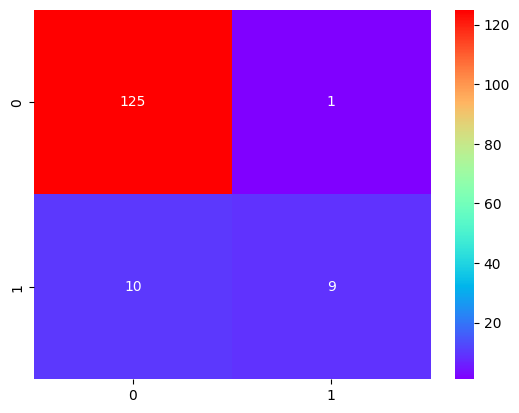

In [79]:
y_pred_LR = LR_model_tfidf.predict(test_x_count)
cm_LR = confusion_matrix(y_test,y_pred_LR)
sns.heatmap(cm_LR, annot=True, fmt = "d",cmap="rainbow")
print("Confusion matrix for Logistic Regression (RL) Count Vectorizer")
print(classification_report(y_test,y_pred_LR))

Confusion matrix for Random Forest (RF) using fastText embedded vectors
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       126
           1       0.00      0.00      0.00        19

    accuracy                           0.87       145
   macro avg       0.43      0.50      0.46       145
weighted avg       0.76      0.87      0.81       145



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


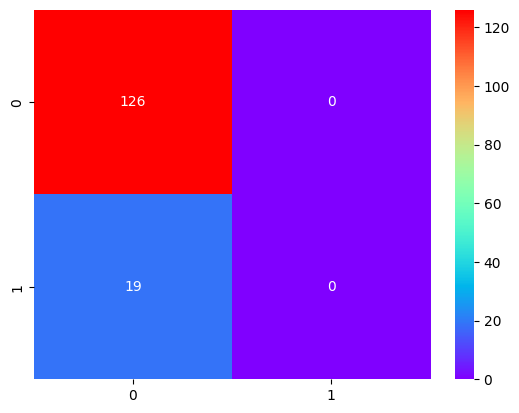

In [80]:

y_pred_RF = RF_model_tfidf.predict(test_x_count)
cm_RF = confusion_matrix(y_test,y_pred_RF)
sns.heatmap(cm_RF, annot=True, fmt = "d",cmap="rainbow")
print("Confusion matrix for Random Forest (RF) using fastText embedded vectors")
print(classification_report(y_test,y_pred_RF))


### **Results using TF-IDF Score Vectorizer**


Confusion matrix for Logistic Regression (RL) TF-IDF Score Vectorizer
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       126
           1       0.92      0.63      0.75        19

    accuracy                           0.94       145
   macro avg       0.94      0.81      0.86       145
weighted avg       0.94      0.94      0.94       145



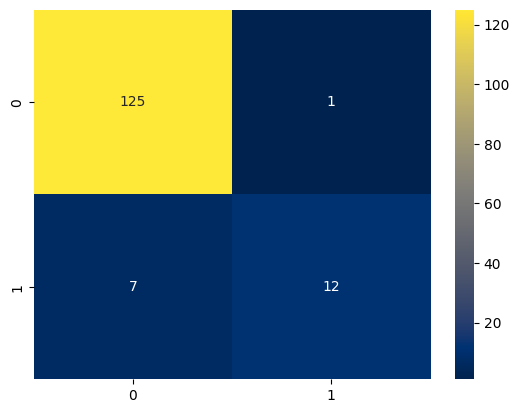

In [81]:
y_pred_LR = LR_model_tfidf.predict(test_x_tfidf)
cm_LR = confusion_matrix(y_test,y_pred_LR)
sns.heatmap(cm_LR, annot=True, fmt = "d",cmap="cividis")
print("Confusion matrix for Logistic Regression (RL) TF-IDF Score Vectorizer")
print(classification_report(y_test,y_pred_LR))

Confusion matrix for Random Forest (RF) using fastText embedded vectors
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       126
           1       0.00      0.00      0.00        19

    accuracy                           0.87       145
   macro avg       0.43      0.50      0.46       145
weighted avg       0.76      0.87      0.81       145



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


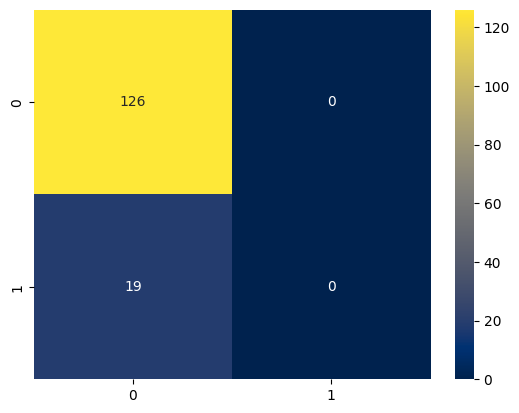

In [82]:

y_pred_RF = RF_model_tfidf.predict(test_x_tfidf)
cm_RF = confusion_matrix(y_test,y_pred_RF)
sns.heatmap(cm_RF, annot=True, fmt = "d",cmap="cividis")
print("Confusion matrix for Random Forest (RF) using fastText embedded vectors")
print(classification_report(y_test,y_pred_RF))


### **Results using FastText Embeddbings**


Confusion matrix for Logistic Regression (RL) using fastText embedded vectors
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       126
           1       0.85      0.58      0.69        19

    accuracy                           0.93       145
   macro avg       0.89      0.78      0.82       145
weighted avg       0.93      0.93      0.93       145



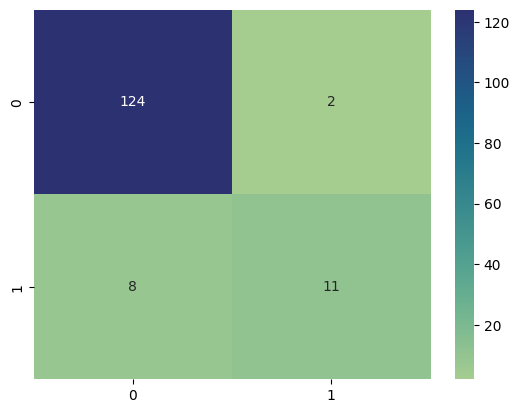

In [83]:
y_pred_LR = LR_model_emb.predict(testEmb)
cm_LR = confusion_matrix(y_test,y_pred_LR)
sns.heatmap(cm_LR, annot=True, fmt = "d",cmap="crest")
print("Confusion matrix for Logistic Regression (RL) using fastText embedded vectors")
print(classification_report(y_test,y_pred_LR))

Confusion matrix for Random Forest (RF) using fastText embedded vectors
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       126
           1       0.80      0.42      0.55        19

    accuracy                           0.91       145
   macro avg       0.86      0.70      0.75       145
weighted avg       0.90      0.91      0.90       145



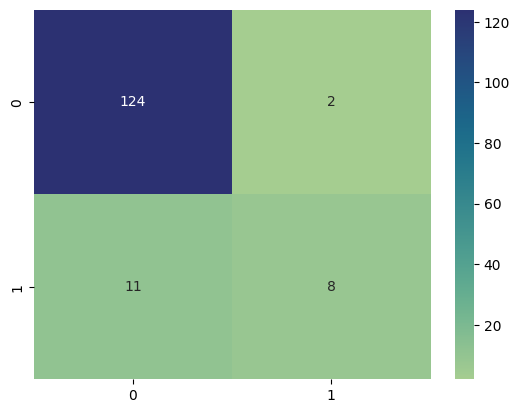

In [84]:

y_pred_RF = RF_model_emb.predict(testEmb)
cm_RF = confusion_matrix(y_test,y_pred_RF)
sns.heatmap(cm_RF, annot=True, fmt = "d",cmap="crest")
print("Confusion matrix for Random Forest (RF) using fastText embedded vectors")
print(classification_report(y_test,y_pred_RF))


# **Conclusions:**


For this week, starting from the fact that it was found that the transformer model "distilbert-base-uncased" showed better results than using machine learning models, for this week it was decided to test this model with data obtained from a website https://www.edmunds.com/ where on this site consumers leave reviews about vehicles from different brands, which were followed by obtaining comments and ratings from them to evaluate the model as being good enough with data that they have not seen in their training and data. that are more recent.

As well as using the training data from the **ConsumerAffairs website** it was observed that there were few positive comments and many negative ones, 29 data were used for the testing part of the model and the results using the "distilbert-base-uncased" transformer model were:

- Base model:
-- 100% acurracy (Test)
-- 95% Acurracy (Validation)

- Model with augmented data in training:
-- 100% accuracy (Test)
-- 95% Acurracy (Validation).

But when evaluating the models using data from the **Edmunds website**, the test results were as follows:

- Base model with Test2 data:
-- 86% Acurracy
-- recall 90% (0) & 84%(1)
-- f1-score 78% (0) & 89%(1)
- Model with augmented data in training with Test2 data:
-- 82% Acurracy
-- recall 97% (0) & 76%(1)
-- f1-score 75% (0) & 86%(1)

We can conclude that Augmentation with Generated comments using GPT2 model did not provide a significant benefit.
The model "distilbert-base-uncased" w/o data agumentation provides good results that we can tune more modifying train parameters.

**Next activities:**

1- Adjust the parameters of the transformer model trying to improve fine tuning to improve recall and F1-score results.

4- Start with the analysis of topics for positive and negative comments.

# **References:**

- Hugging Face. (s.f.). Text generation strategies. En Hugging Face Transformers Documentation. Recuperado de https://huggingface.co/docs/transformers/en/generation_strategies#diverse-beam-search-decoding

- Liu, X. (s.f.). distilbert-base-multilingual-cased-sentiments-student. Hugging Face. Recuperado de https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student

- Hugging Face. (s.f.). Transformers: Training & Fine-Tuning. Recuperado de https://huggingface.co/docs/transformers/training

- ParseHub. (n.d.). What Is Web Scraping? | ParseHub. ParseHub. Retrieved January 28, 2024, from https://www.parsehub.com/blog/what-is-web-scraping/

- Falcón Morales, L. E. (2023). Maestría en Inteligencia Artificial Aplicada. ITESM

- Kumar Mukhiya, S., y Ahmed, U. (2020). Hands-On Exploratory Data Analysis with Python. Packt Publishing.

- Falcón Morales, L. E. (2023). Expresiones regulares (regex). Maestría en Inteligencia Artificial Aplicada. ITESM.

- KeepCoding. (2023). ¿Qué es el count vectorizer?. https://keepcoding.io/blog/que-es-el-count-vectorizer/#:~:text=El%20count%20vectorizer%20es%20una,de%20a%20nivel%20de%20token.

- KeepCoding. (2023). ¿Qué es el TF-IDF Vectorizer?. https://keepcoding.io/blog/que-es-el-algoritmo-tf-idf-vectorizer/#:~:text=El%20TF%2DIDF%20tiene%20en,de%20TF%2DIDF%20Vectorizer%20bajo.

- Facebook. (2022). Get started. https://fasttext.cc/docs/en/support.html

- Introduction to word embeddings – word2vec, glove, FastText and Elmo. Data Science Machine Learning Deep Learning. (n.d.). https://www.alpha-quantum.com/blog/word-embeddings/introduction-to-word-embeddings-word2vec-glove-fasttext-and-elmo/